<a href="https://colab.research.google.com/github/aquapathos/MLLesson/blob/master/ML02%20%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%AE%E5%AD%A6%E7%BF%92/0.%20Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# モジュールのインポート
!apt-get -qq -y install fonts-ipafont-gothic > /dev/null
import pandas as pd
import numpy as np
from sklearn import tree
from graphviz import Digraph,Source
import pydotplus as pdp

![2017-09-23 18 27 59](https://user-images.githubusercontent.com/5820803/30771930-0fbc20de-a08d-11e7-922a-6e8e641170f4.PNG)



In [4]:
rawdata=np.array([
    [0,0,0,1,"負"],
    [1,2,1,1,"負"],
    [1,1,0,1,"負"],
    [0,0,1,1,"負"],
    [0,2,1,0,"正"],
    [0,1,1,0,"正"],
    [0,2,0,0,"負"],
    [1,2,1,0,"正"],
    ])

items=['住居形態','家族構成','収入','ローン残']
results=['販売実績']
df = pd.DataFrame(rawdata,columns=np.r_[items,results])
df

,住居形態,家族構成,収入,ローン残,販売実績
0,0,0,0,1,負
1,1,2,1,1,負
2,1,1,0,1,負
3,0,0,1,1,負
4,0,2,1,0,正
5,0,1,1,0,正
6,0,2,0,0,負
7,1,2,1,0,正


# 決定木の生成プログラム

# 訓練データをもとに決定木を構成する

In [5]:
# 決定木学習器の準備
classifier = tree.DecisionTreeClassifier(criterion='entropy') # 評価基準を情報量基準（entropy)とする。
# 訓練データをもとに学習の実行
classifier.fit(df[items],df[results]);

# 完成した決定木をpng画像として出力

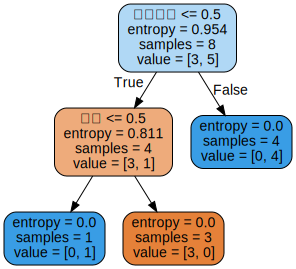

In [6]:
# Graphviz 用の dot データを作成する
dot_data = tree.export_graphviz(classifier, 
            out_file=None, # 出力ファイル名 None なら出力しない
            filled=True, # ノードを色づけする
            rounded=True, # ノードの角を丸く
            feature_names=items) 

# 画像の保存
graph = pdp.graph_from_dot_data(dot_data)
for node in graph.get_nodes():
    node.set_fontname("IPAGothic")
graph.write_png("販売予測.png")

# 画面表示用データの作成
Source(dot_data)

### 解説
既知の８ケース中、住宅形態、家族構成、収入、ローン残高の４項目のうち一つだけで決まっている可能性を考える。  
- 「住宅形態」をチェックすると、マンション住まいの人がかならず買ってくれる、あるいは買わないということはない。一戸建ても同様である。
- 「家族構成」では、独身は買わないようである、ということだけわかる。独身は８ケース中２ケースだから、この法則が正しいなら、1/4 は独身かどうかだけチェックしたら確定する。
- 「収入」については、高収入の人は買ってくれることもあるが必ずそうとも限らない。低収入の人は総じて買わない。この経験的知識で判断できるケースは3/8である。
- 「ローン残高」の場合は、残高がある人は購入してくれたないという法則が成り立ちそうである。これで判断できるのは 1/2

よって、効率を考えれば、「ローン残高」を最初のチェック項目とするのがよいという結論になる。この項目で八件中四件は購入しないと予測できるので、あとは残りの４件に絞って次の判断項目を考えればよい。  

残り４件も同様にしてどの項目が実績のあるなしと相関があるかを調べていけばよいのだが、次は簡単で、収入の高低と実績の有無が完全に一致しているので、２つ目の検査項目は「収入」がベストであるのは自明である。

上の図では、「ローン残 <= 0.5」と表示されているが、ローン残は０か１かのデータとしているので、True はローン残が０つまり「なし」、False は「あり」を意味する。




# 全判定結果

In [8]:
df['判定結果']=classifier.predict(df[items])
df

,住居形態,家族構成,収入,ローン残,販売実績,判定結果
0,0,0,0,1,負,負
1,1,2,1,1,負,負
2,1,1,0,1,負,負
3,0,0,1,1,負,負
4,0,2,1,0,正,正
5,0,1,1,0,正,正
6,0,2,0,0,負,負
7,1,2,1,0,正,正


In [9]:
print("正解率 {:3.2f}　％".format((df['販売実績'] != df['判定結果']).value_counts()[False]*100/8))

正解率 100.00　％
